In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
%%R
library(rethinking)

/home/dan/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: rstan

  warnings.warn(x, RRuntimeWarning)
/home/dan/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/home/dan/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: StanHeaders

  warnings.warn(x, RRuntimeWarning)
/home/dan/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)

  warnings.warn(x, RRuntimeWarning)
/home/dan/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

  warnings.warn(x, RRun

# R

In [3]:
%%R

# define grid 
p_grid <- seq(from=0, to=1, length.out=20)
# define prior 
prior <- rep(1 , 20)
# compute likelihood at each value in grid 
likelihood <- dbinom(6, size=9, prob=p_grid)
# compute product of likelihood and prior 
unstd.posterior <- likelihood * prior
# standardize the posterior, so it sums to 1 
posterior <- unstd.posterior / sum(unstd.posterior)


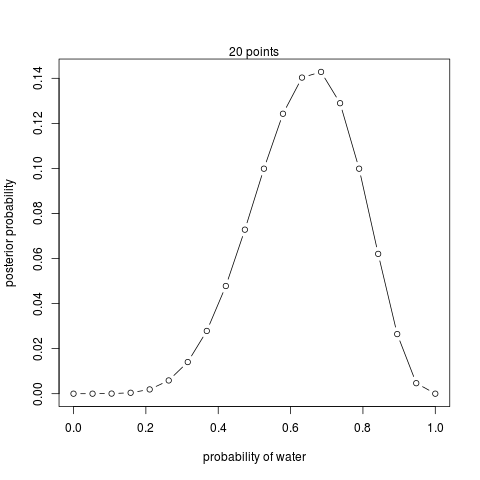

In [4]:
%%R
plot(p_grid , posterior , type="b" , xlab="probability of water" , ylab="posterior probability") 
mtext("20 points")

# Python

In [5]:
_size = 20
# Define the grid
p_grid = np.linspace(0, 1, _size)

# Define a uniform prior
prior = np.ones(_size)

# compute likelihood at each value in grid
# stats.binom.pmf(x, n, p)
likelihood = stats.binom.pmf(6, 9, p_grid)

# compute product of likelihood and prior 
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1 
posterior = unstd_posterior / sum(unstd_posterior)

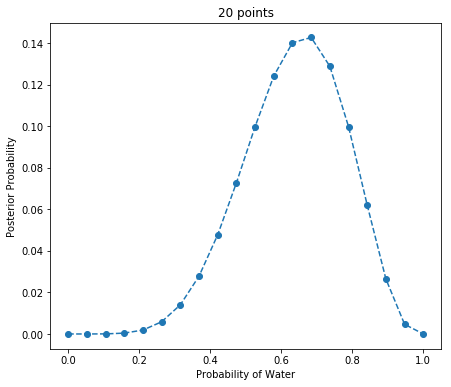

In [6]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(p_grid, posterior, marker='o', linestyle='--')
plt.title("20 points")
plt.xlabel('Probability of Water')
plt.ylabel('Posterior Probability')
plt.show()